In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Print functon for charts
%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# sk learn imports ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Loading the datasets
df = pd.read_csv("/content/diamonds.csv")

In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.shape

(53940, 11)

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['cut'] = encoder.fit_transform(df['cut'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['color'] = encoder.fit_transform(df['color'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['clarity'] = encoder.fit_transform(df['clarity'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


Text(0.5, 1.0, 'Correlation Matrix')

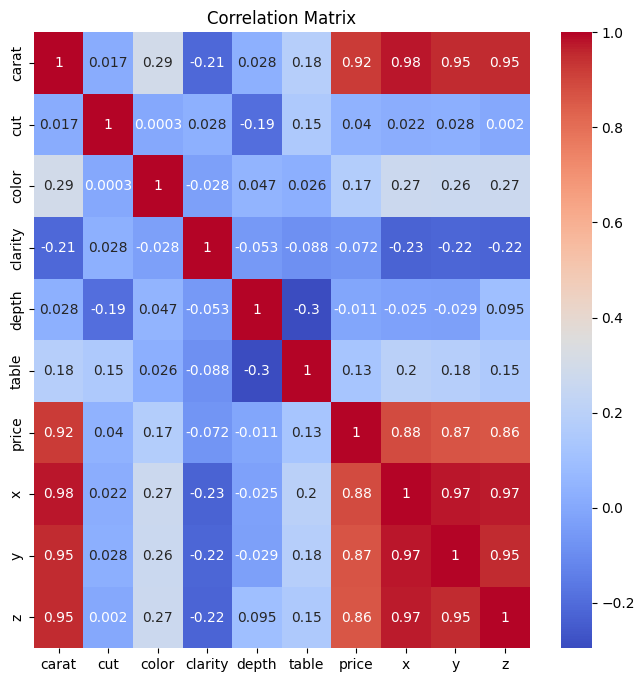

In [ ]:
#Plotting the correlation matrix "Heatmap"

#Setting the figure size for the plot
plt.figure(figsize=(8, 8))

#Creating the heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
#cmap='coolwarm' sets the color palette for the heatmap

#adding title to heatmap
plt.title('Correlation Matrix')

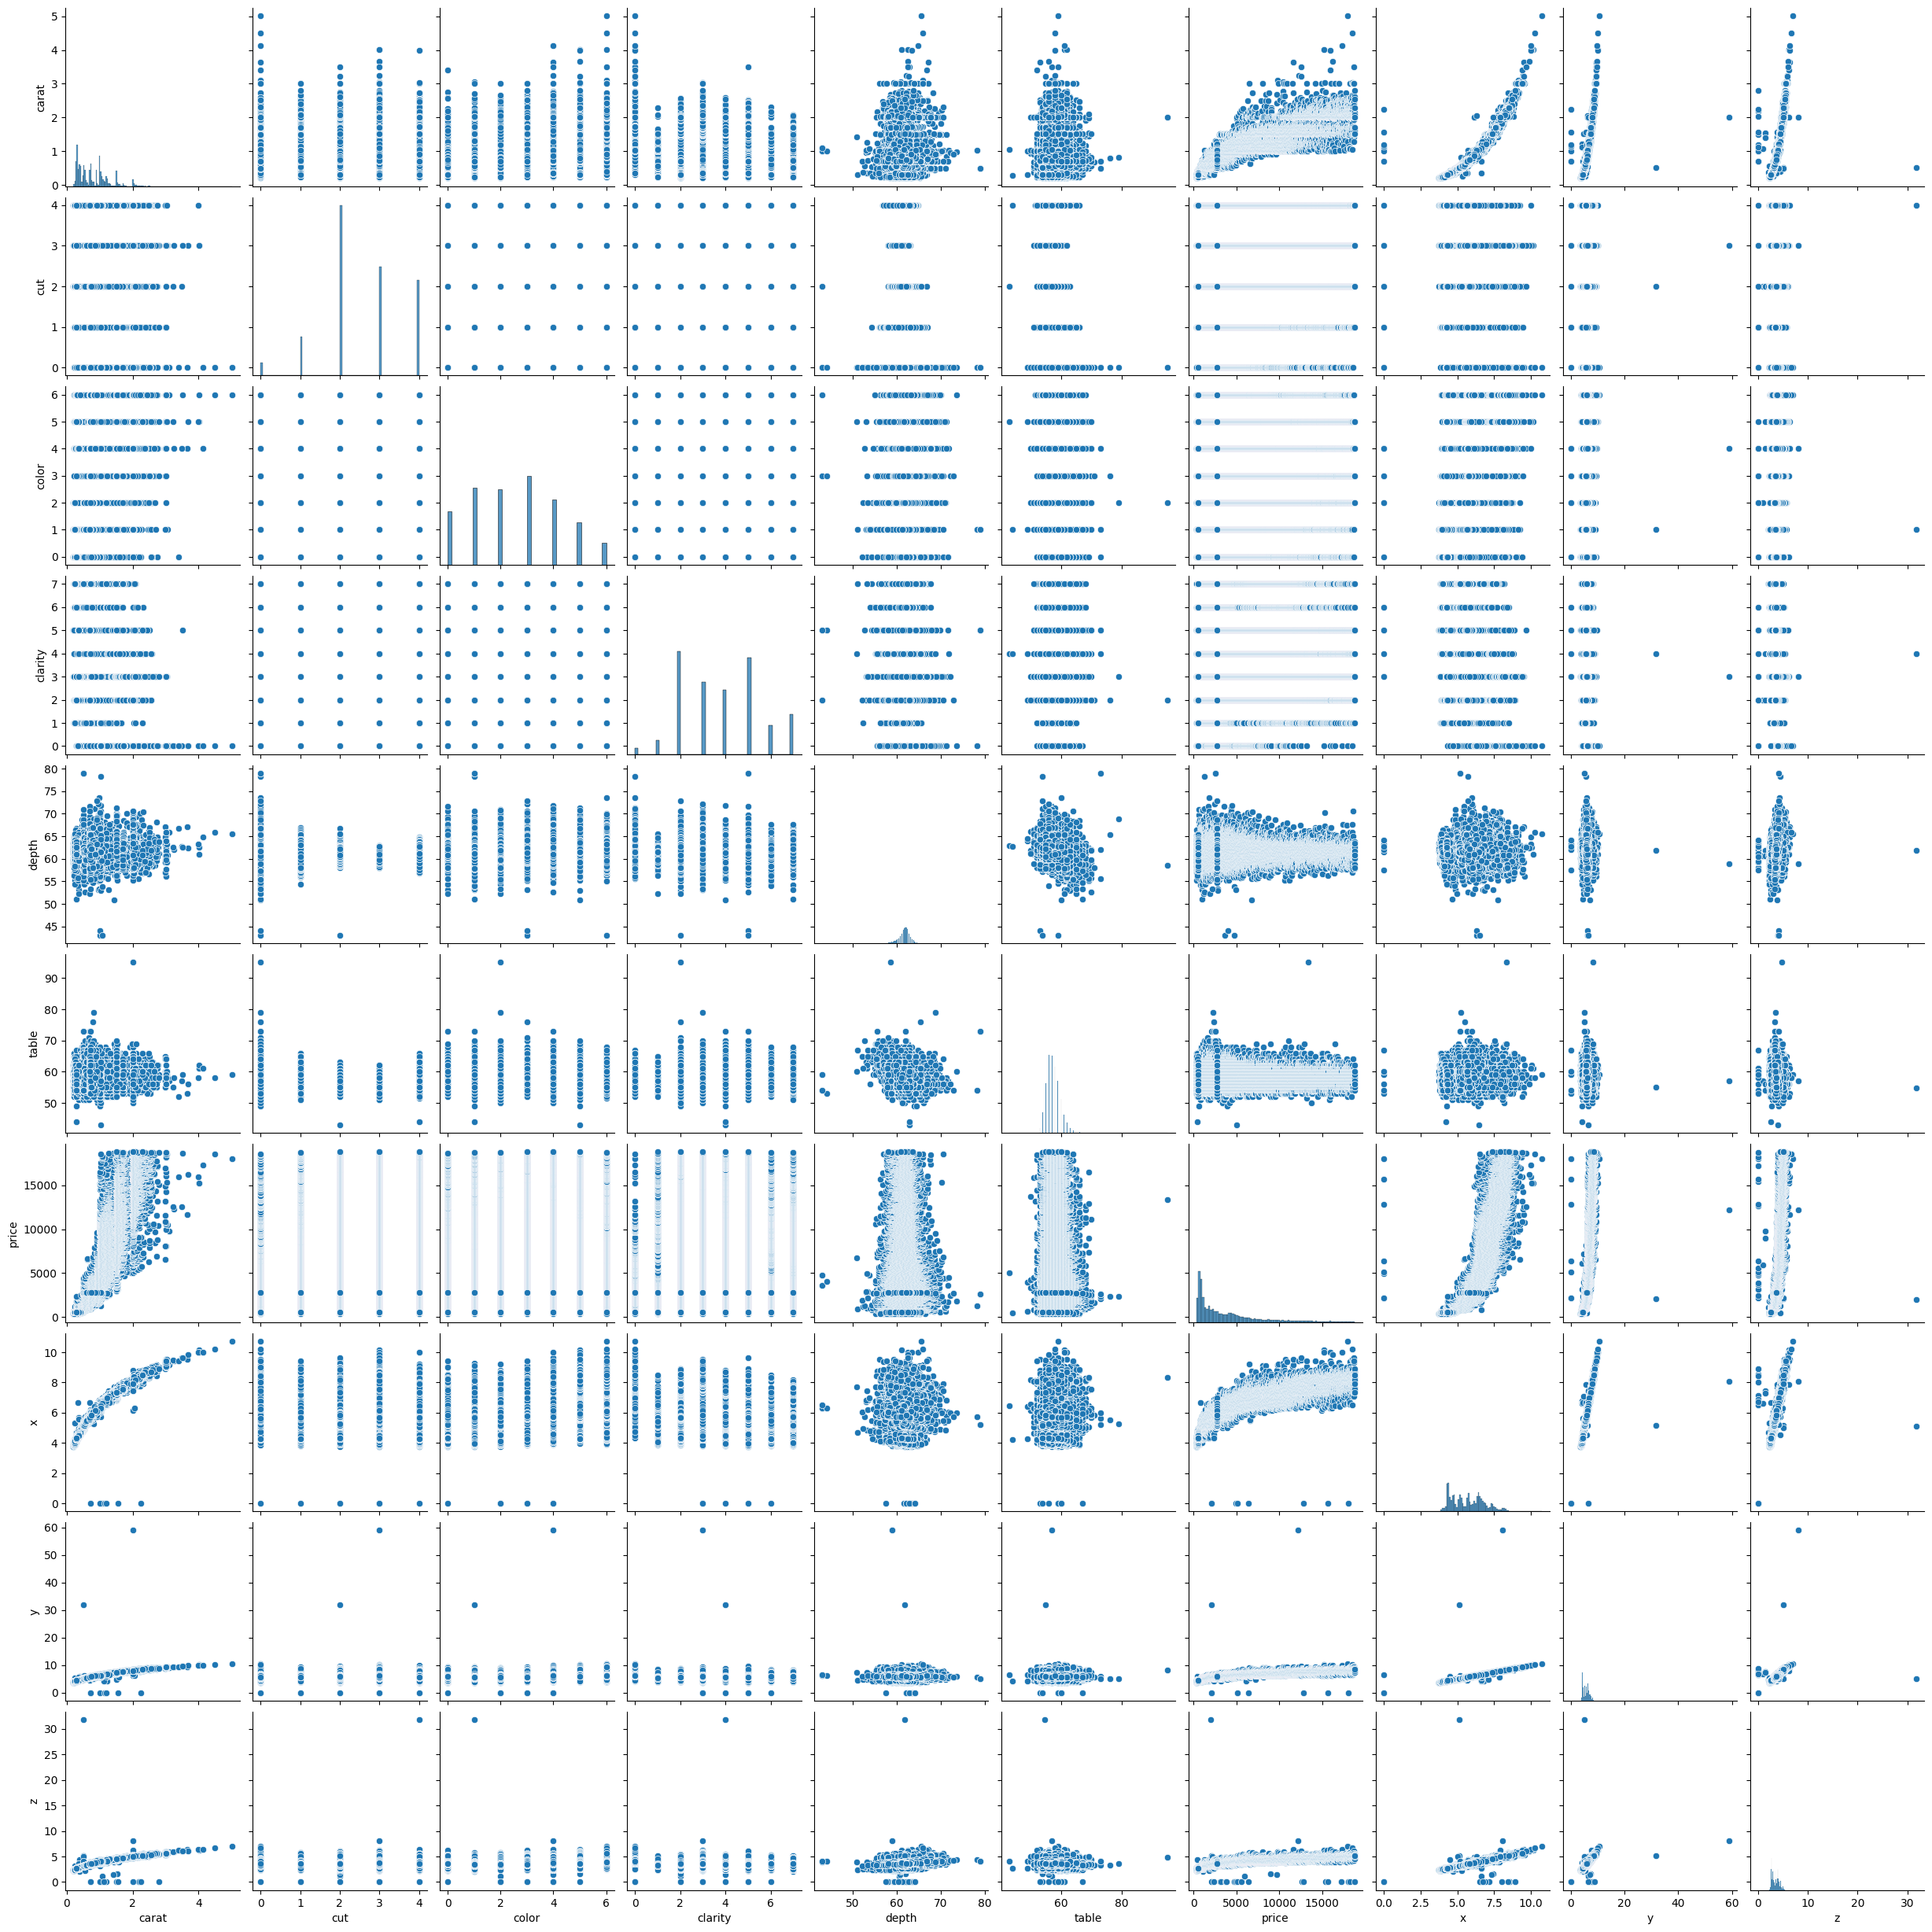

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

   feature          VIF
0    carat    71.280619
1      cut     7.452458
2    color     3.656752
3  clarity     6.216738
4    depth   532.475672
5    table   521.222987
6        x  1285.950850
7        y   531.783819
8        z   542.223353


In [ ]:
X = df.drop(['x','y','z','price'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

   feature         VIF
0    carat    4.495311
1      cut    7.434948
2    color    3.646670
3  clarity    6.197208
4    depth  402.120159
5    table  421.230799


In [ ]:
X = df.drop(['x','y','z','price','table','depth'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

   feature       VIF
0    carat  3.608880
1      cut  4.857008
2    color  3.431631
3  clarity  3.958956


In [ ]:
X.columns

Index(['carat', 'cut', 'color', 'clarity'], dtype='object')

<Axes: xlabel='carat', ylabel='Density'>

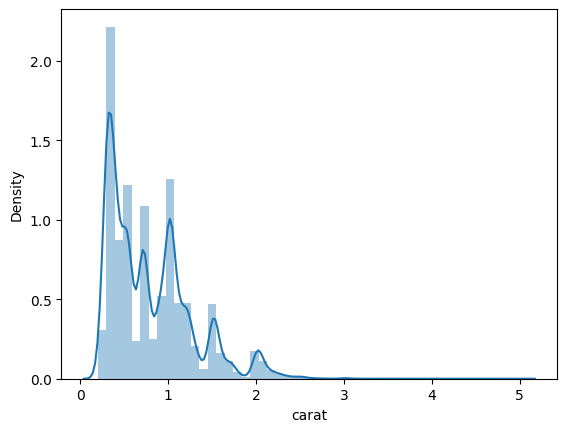

In [ ]:
sns.distplot(df['carat'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 87.7637%
R2 Score :  86.27 %


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = dtr.predict(X_test)
R2_score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_score_dtr,"%")

R2 Score :  97.24 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
# RandomForestRegressor mean cross-validation
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print('RandomForestRegressor')
print(mean(cv)*100)

RandomForestRegressor
97.76356260255422


In [ ]:
#GradientBoostingRegressor mean cross-validation
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)
cv = cross_val_score(gbr, X_train, y_train, cv=5)
print('GradientBoostingRegressor')
print(mean(cv)*100)

GradientBoostingRegressor
97.0914387839985
